<a href="https://colab.research.google.com/github/akib1162100/ML_base/blob/main/bsml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install openpyxl

In [4]:
data = pd.read_excel("Online Retail Data Set.xlsx")

In [5]:
data['Quantity'] = data['Quantity'].abs()

In [6]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [7]:
data['CustomerID'] = data['CustomerID'].ffill()
from sklearn.impute import SimpleImputer
description_column = data[['Description']]

# Initialize SimpleImputer with strategy 'most_frequent'
imputer_description = SimpleImputer(strategy='most_frequent')

# Fit and transform the 'Description' column
description_column_filled = imputer_description.fit_transform(description_column)

# Convert filled values to a DataFrame with the original index
description_filled_df = pd.DataFrame(description_column_filled, index=data.index, columns=['Description'])

# Replace the original 'Description' column with the filled values
data['Description'] = description_filled_df['Description']

In [8]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
df = pd.get_dummies(data, columns=['Country'])

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [11]:
scaler = StandardScaler()
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Quantity', 'UnitPrice']])
df['PCA1'] = df_pca[:,0]
df['PCA2'] = df_pca[:,1]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,PCA1,PCA2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.024498,2010-12-01 08:26:00,-0.021301,17850.0,False,False,False,...,False,False,False,False,False,False,True,False,0.002260,-0.032385
1,536365,71053,WHITE METAL LANTERN,-0.024498,2010-12-01 08:26:00,-0.012620,17850.0,False,False,False,...,False,False,False,False,False,False,True,False,0.008399,-0.026247
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.015324,2010-12-01 08:26:00,-0.019234,17850.0,False,False,False,...,False,False,False,False,False,False,True,False,-0.002765,-0.024436
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.024498,2010-12-01 08:26:00,-0.012620,17850.0,False,False,False,...,False,False,False,False,False,False,True,False,0.008399,-0.026247
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.024498,2010-12-01 08:26:00,-0.012620,17850.0,False,False,False,...,False,False,False,False,False,False,True,False,0.008399,-0.026247


In [13]:
!pip install matplotlib seaborn

Data Overview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice  

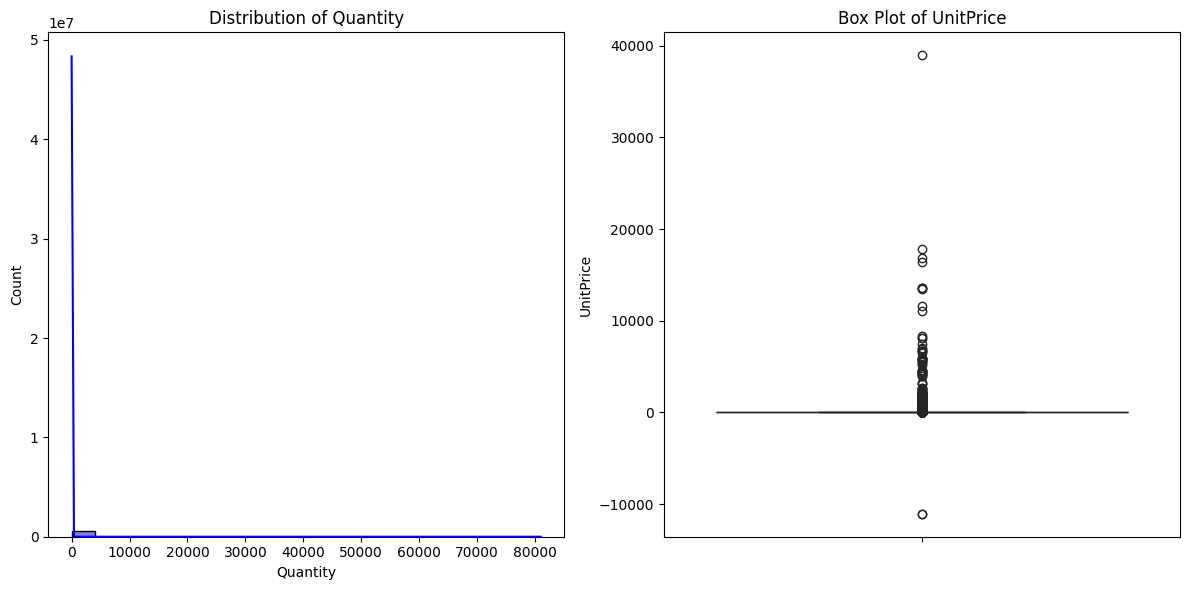

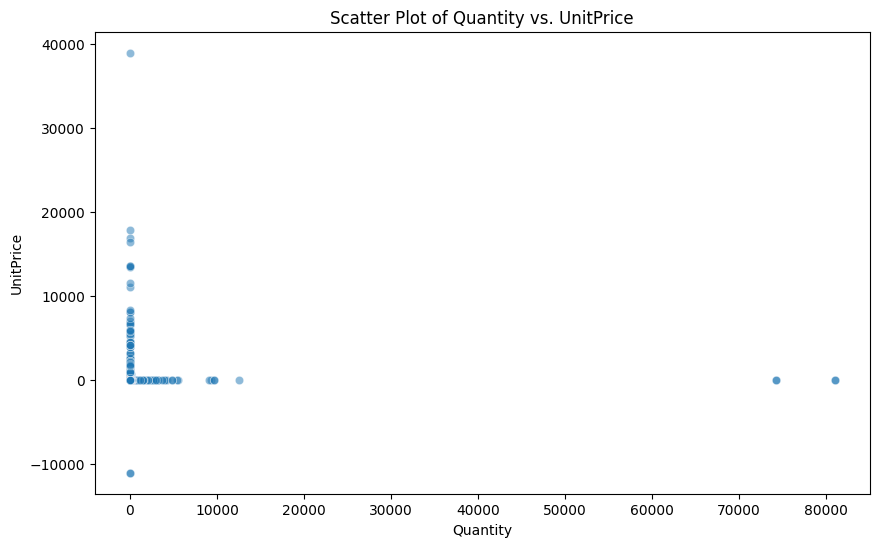

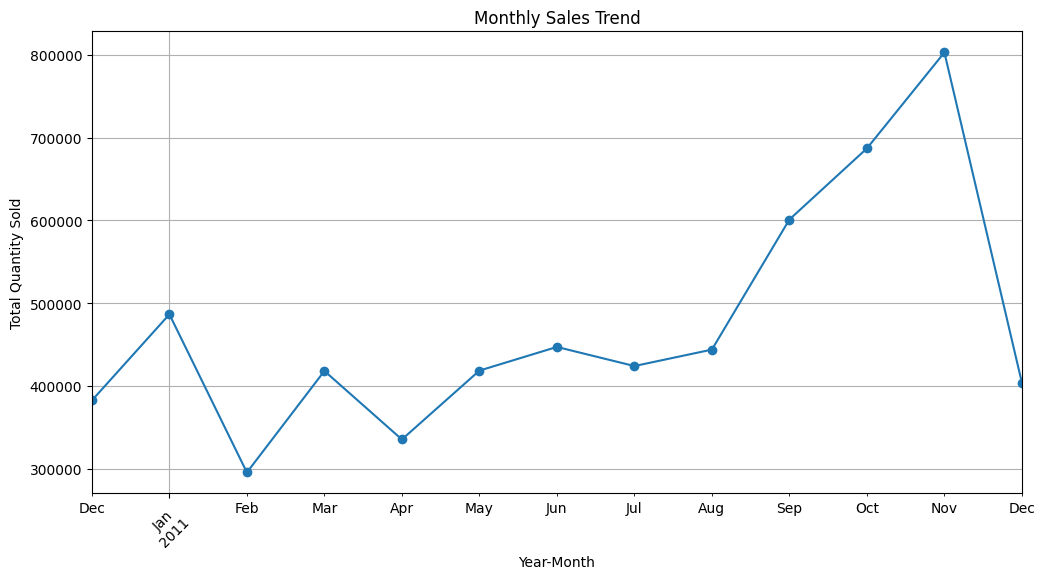

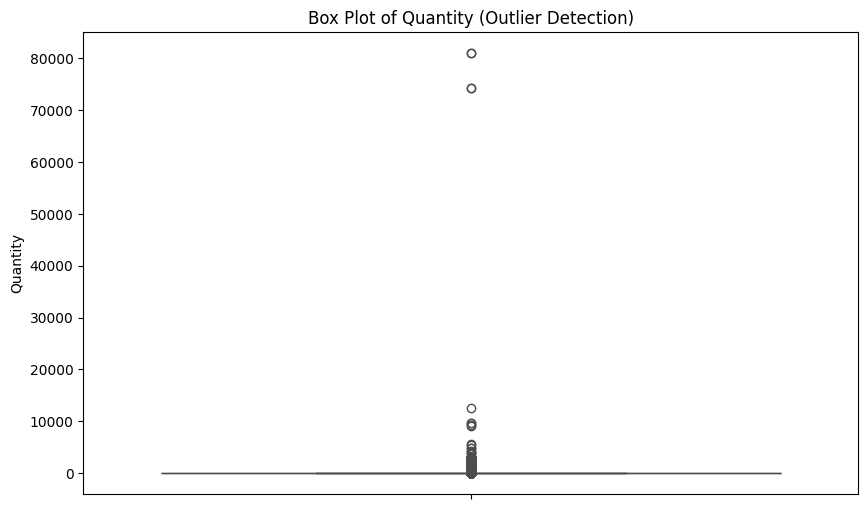

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

print("Data Overview:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())
print("\nUnique Values:")
print(data.nunique())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Quantity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y='UnitPrice', data=data, color='green')
plt.title('Box Plot of UnitPrice')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data, alpha=0.5)
plt.title('Scatter Plot of Quantity vs. UnitPrice')
plt.show()

monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(y='Quantity', data=data, color='orange')
plt.title('Box Plot of Quantity (Outlier Detection)')
plt.show()

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [18]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.024498   
1    536365     71053                  WHITE METAL LANTERN -0.024498   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.015324   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.024498   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.024498   

          InvoiceDate  UnitPrice  CustomerID  Country_Australia  \
0 2010-12-01 08:26:00  -0.021301     17850.0              False   
1 2010-12-01 08:26:00  -0.012620     17850.0              False   
2 2010-12-01 08:26:00  -0.019234     17850.0              False   
3 2010-12-01 08:26:00  -0.012620     17850.0              False   
4 2010-12-01 08:26:00  -0.012620     17850.0              False   

   Country_Austria  Country_Bahrain  ...  Country_Singapore  Country_Spain  \
0            False            False  ...              False          False   
1       

In [19]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            return {'class': np.argmax(np.bincount(y)), 'depth': depth}

        # Find best split
        best_gini = np.inf
        best_feature, best_threshold = None, None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        # Create subtree
        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree, 'depth': depth}

    def _gini_impurity(self, *groups):
        total_samples = sum(len(group) for group in groups)
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for class_val in range(self.n_classes_):
                p = [np.sum(group == class_val) / size for group in groups]
                score += p[class_val] ** 2
            gini += (1.0 - score) * (size / total_samples)
        return gini

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, tree):
        if 'class' in tree:
            return tree['class']
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_tree(x, tree['left'])
        else:
            return self._predict_tree(x, tree['right'])


class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        # Initialize predictions with the mean of target values
        self.base_prediction = np.mean(y)
        y_pred = np.full_like(y, self.base_prediction)

        # Iterate over number of estimators
        for _ in range(self.n_estimators):
            # Calculate residuals
            residuals = y - y_pred

            # Fit a decision tree to residuals
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Update predictions with new tree's predictions
            y_pred += self.learning_rate * tree.predict(X)

            # Save the tree
            self.trees.append(tree)

    def predict(self, X):
        # Make predictions by summing predictions of all trees
        y_pred = np.full(len(X), self.base_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'data' contains the provided dataset

# Convert categorical variables into numerical format using one-hot encoding
# data = pd.get_dummies(data, columns=['Country'])

# Handle missing values (if any)
df.fillna(0, inplace=True)
df['CustomerID'] = df['CustomerID'].astype(str)

# Scale the numeric features
scaler = StandardScaler()
df[['Quantity', 'UnitPrice', 'PCA1', 'PCA2']] = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'PCA1', 'PCA2']])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['CustomerID'])  # Features
y = df['CustomerID']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)


In [31]:
# prompt:  Encode the non -numerical values:
# from sklearn.preprocessing import OneHotEncoder
# # Create an instance of the OneHotEncoder
# ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# # Fit the encoder on the training data
# ohe.fit(X_train[['InvoiceNo', 'StockCode', 'Description', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', ...]])
# # Transform both the training and testing data
# X_t

from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train['InvoiceNo'] = X_train['InvoiceNo'].astype(str)
X_test['InvoiceNo'] = X_test['InvoiceNo'].astype(str)
X_train['StockCode'] = X_train['StockCode'].astype(str)
X_test['StockCode'] = X_test['StockCode'].astype(str)
X_train['Description'] = X_train['Description'].astype(str)
X_test['Description'] = X_test['Description'].astype(str)

# Fit the encoder on the training data
ohe.fit(X_train[['InvoiceNo', 'StockCode', 'Description']])

# Transform both the training and testing data
X_train_encoded = ohe.transform(X_train[['InvoiceNo', 'StockCode', 'Description']])
X_test_encoded = ohe.transform(X_test[['InvoiceNo', 'StockCode', 'Description']])


In [32]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbm_model.fit(X_train.values, y_train.values)

# Predict on the testing dataset
y_pred = gbm_model.predict(X_test.values)

# Now you can evaluate the performance of the model using appropriate metrics
# For example, you can use mean squared error (MSE) or R-squared (R2) score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test.values, y_pred)
r2 = r2_score(y_test.values, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

IndexError: list index out of range

In [25]:
print(X_train.dtypes)

InvoiceNo                               object
StockCode                               object
Description                             object
Quantity                               float64
InvoiceDate                     datetime64[ns]
UnitPrice                              float64
Country_Australia                         bool
Country_Austria                           bool
Country_Bahrain                           bool
Country_Belgium                           bool
Country_Brazil                            bool
Country_Canada                            bool
Country_Channel Islands                   bool
Country_Cyprus                            bool
Country_Czech Republic                    bool
Country_Denmark                           bool
Country_EIRE                              bool
Country_European Community                bool
Country_Finland                           bool
Country_France                            bool
Country_Germany                           bool
Country_Greec